##### Notes:

There are 16941 audio files in train_audio

Number of unique labels: 264

## Step 1: Data Exploration and Preprocessing

In [1]:
import pandas as pd

# Load train_metadata
train_metadata = pd.read_csv('/home/supercow/Desktop/Work/BirdCLEF2024/BirdCLEF2023/birdclef-2023/train_metadata.csv')

# Display metadata information
print(train_metadata.head())

  primary_label secondary_labels              type  latitude  longitude  \
0       abethr1               []          ['song']    4.3906    38.2788   
1       abethr1               []          ['call']   -2.9524    38.2921   
2       abethr1               []          ['song']   -2.9524    38.2921   
3       abethr1               []          ['song']   -2.9524    38.2921   
4       abethr1               []  ['call', 'song']   -2.9524    38.2921   

      scientific_name               common_name         author  \
0  Turdus tephronotus  African Bare-eyed Thrush  Rolf A. de By   
1  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
2  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
3  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
4  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   

                                             license  rating  \
0  Creative Commons Attribution-NonCommercial-Sha...     4.0   
1  Creative Commons Attr

In [2]:
num_classes = train_metadata['primary_label'].nunique()
print("Number of unique labels:", num_classes)

Number of unique labels: 264


In [3]:
# Loading an example audio file
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np



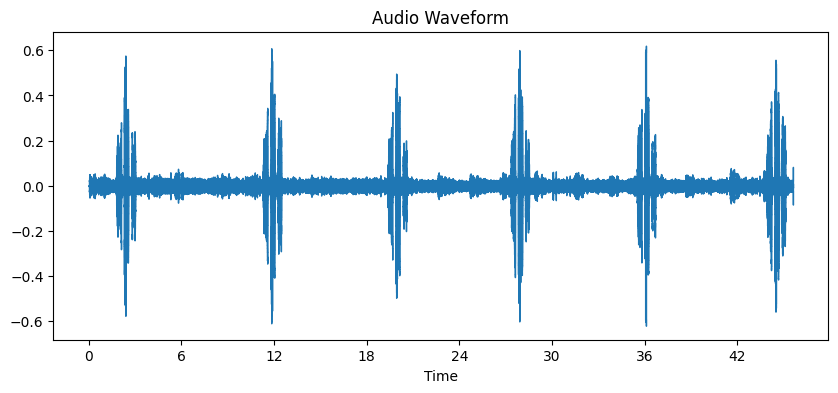

In [4]:
# Loading an example audio file
audio_path = '/home/supercow/Desktop/Work/BirdCLEF2024/BirdCLEF2023/birdclef-2023/train_audio/abethr1/XC128013.ogg'
y, sr = librosa.load(audio_path, sr=None)

# Display audio waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.show()

## Step 2: Feature Extraction


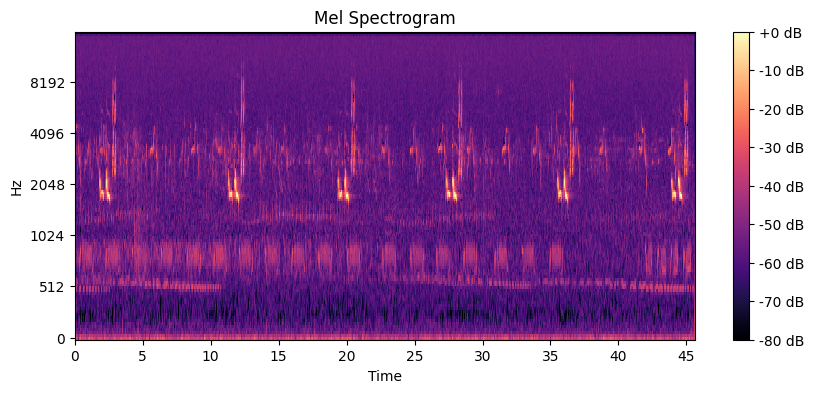

In [5]:
# Converting waveform to a mel spectogram which is easier for feature selection and more in-line with how humans perceive sounds.
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Display Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


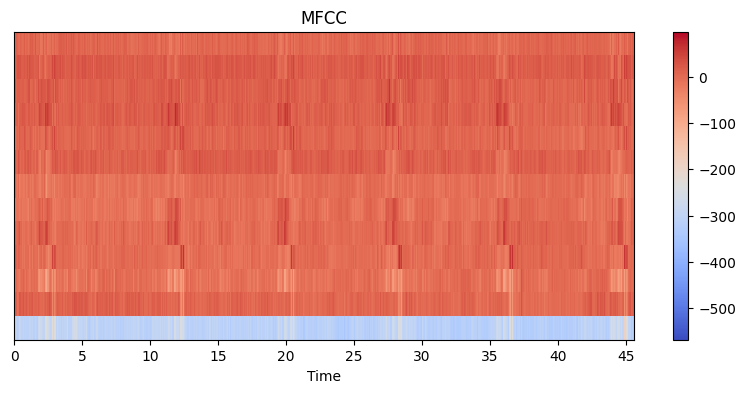

In [6]:
# Extract MFCC (Mel-frequency cepstral coefficients: representation of the short-term power spectrum of an audio signal) features
# MFCCs are commonly used in automatic speech and speaker recognition and music information retrieval.
# They were inspired by the cepstrum representation of the human auditory system.
# The MFCC representation of an audio signal is obtained by taking the Fourier transform of a windowed excerpt of the signal 
# and mapping the log power spectrum of the result onto the mel scale, using triangular overlapping windows.
# The MFCCs are the amplitudes of the resulting mel spectrum, 
# which is then transformed to the frequency domain using the discrete cosine transform.

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)             # n_mfcc is the number of MFCCs to return.
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

## Step 3: Model Selection

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

# Basic CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# model.save('bird_CNN_1.h5')


/home/supercow/Desktop/Work/BirdCLEF2024/bird/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-06 22:30:03.454953: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.
2024-06-06 22:30:03.705953: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    16,257,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 264)            │        34,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,291,528 (62.15 MB)

 Trainable params: 16,291,528 (62.15 MB)

 Non-trainable params: 0 (0.00 B)

## Step 4: Model Training

In [ ]:
# TODO: Convert all 16941 audio files into MFCC format (and save them as numpy arrays?) 
# TODO: Figure out how to to this in batches (since all files won't fit in memory at once i think)
# TODO: Figure out how to feed this data into the CNN model
# TODO: Train the model
# TODO: Evaluate the model
# TODO: Make predictions on the test set
